# Rosalía Albums Analysis

We’ll try to do unsupervised learning by clustering the Rosalía Spotify data using K-means. The dataset was obtained using the Spotipy library, executing the get_data function (see get_data.py).

## Importing libraries

In [1]:
# import required libraries for dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import required libraries for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings

%matplotlib inline

sns.set_theme(style="ticks")

warnings.simplefilter("ignore")

## Data Import

In [2]:
df = pd.read_csv("data/artist_tracks.csv")

In [3]:
df.head()

,album_name,track_number,song_title,id,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,MOTOMAMI,1,SAOKO,2FYGZDfsAnNsrm1gVbyKnG,137533,0.790,0.827,0.768,0.000024,0,0.4970,-5.702,1,0.2650,99.988,4,0.734
1,MOTOMAMI,2,CANDY,70AYiGbc4mWZGEqiipBBDb,193480,0.885,0.638,0.490,0.011600,4,0.1560,-5.726,0,0.2260,179.905,4,0.403
2,MOTOMAMI,3,LA FAMA (with The Weeknd),6Y46tOTRhkBamosyuWa6YX,188106,0.947,0.766,0.295,0.000044,0,0.1190,-7.893,0,0.0464,136.016,4,0.805
3,MOTOMAMI,4,BULERÍAS,5tmrMIajDQRBcJQPaoAGdk,155880,0.932,0.774,0.458,0.000122,0,0.1910,-6.301,1,0.3030,127.330,3,0.757
4,MOTOMAMI,5,CHICKEN TERIYAKI,6hH6QJ9ZAO0Z6m7PfvLoXW,122226,0.454,0.788,0.400,0.000141,2,0.0686,-6.454,1,0.1150,97.936,4,0.558


In [4]:
df.columns

Index(['album_name', 'track_number', 'song_title', 'id', 'duration',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [5]:
df.dtypes

album_name           object
track_number          int64
song_title           object
id                   object
duration              int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

The description of columns:

`album_name`: The album name 

`track_number`: The track number of the song in the album

`song_title`: The song name.

`id`: The Spotify ID for the track 

`acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

`danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

`duration`: The duration of the track in milliseconds.

`energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

`instrumentalness`: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

`key`: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

`liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

`loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

`mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

`speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

`tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

`time_signature`: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

`valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [6]:
# Transforming the duration column from miliseconds to seconds
df["duration"] = df["duration"].apply(lambda x: x/1000)

# Droping the ID column 
df.drop("id", axis=1, inplace=True)

df.head()

,album_name,track_number,song_title,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,MOTOMAMI,1,SAOKO,137.533,0.790,0.827,0.768,0.000024,0,0.4970,-5.702,1,0.2650,99.988,4,0.734
1,MOTOMAMI,2,CANDY,193.480,0.885,0.638,0.490,0.011600,4,0.1560,-5.726,0,0.2260,179.905,4,0.403
2,MOTOMAMI,3,LA FAMA (with The Weeknd),188.106,0.947,0.766,0.295,0.000044,0,0.1190,-7.893,0,0.0464,136.016,4,0.805
3,MOTOMAMI,4,BULERÍAS,155.880,0.932,0.774,0.458,0.000122,0,0.1910,-6.301,1,0.3030,127.330,3,0.757
4,MOTOMAMI,5,CHICKEN TERIYAKI,122.226,0.454,0.788,0.400,0.000141,2,0.0686,-6.454,1,0.1150,97.936,4,0.558


## Exploratory Data Analysis

## Total songs

In [7]:
len(df)

39

## Number of songs in each album

In [8]:
albums_sorted = {"Los Ángeles": 1, "El Mal Querer": 2, "MOTOMAMI": 3}

In [9]:
albums_number_of_tracks = (df[["album_name", "track_number"]]
 .groupby("album_name").max()
 .reset_index()
 .rename(columns={"track_number": "total_songs"})
 .sort_values(by=["album_name"], 
              key=lambda x: x.map(albums_sorted))
)

albums_number_of_tracks

,album_name,total_songs
1,Los Ángeles,12
0,El Mal Querer,11
2,MOTOMAMI,16


In [10]:
album_colors = {"MOTOMAMI": "#C71818", "El Mal Querer": "#6CB1A0", "Los Ángeles": "#2A2A2A"}

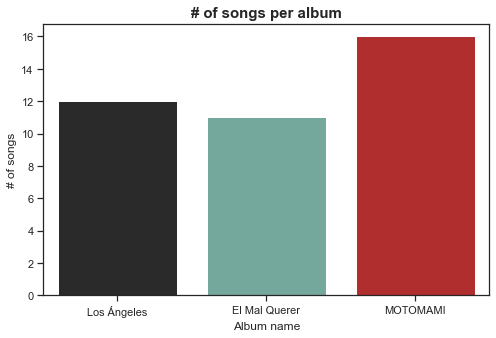

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x="album_name", y="total_songs", 
            data=albums_number_of_tracks, 
            palette=album_colors,
            label="Total", ax=ax)

ax.set(xlabel="Album name", ylabel="# of songs")

ax.set_title("# of songs per album", 
             fontweight="bold", 
             fontsize=15)

plt.show()

## Songs' length statistics

In [12]:
(df.groupby("album_name")["duration"]
 .agg(["min", "max", "mean", "std"])
 .reset_index()
 .sort_values(by="min")
)

,album_name,min,max,mean,std
0,El Mal Querer,40.690,269.538,165.31600,60.155417
2,MOTOMAMI,61.346,262.200,159.08475,55.270765
1,Los Ángeles,88.545,366.058,245.86400,84.633363


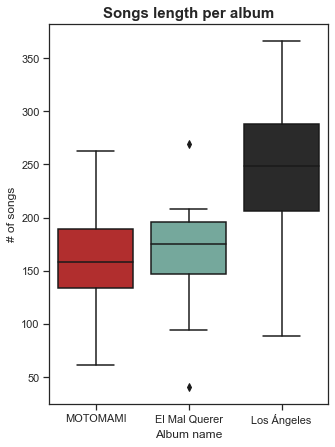

In [13]:
fig, ax = plt.subplots(figsize=(5, 7))

sns.boxplot(x="album_name", y="duration", 
            data=df, palette=album_colors, ax=ax)

ax.set(xlabel="Album name", ylabel="# of songs")

ax.set_title("Songs length per album", 
             fontweight="bold", 
             fontsize=15)

plt.show()

## Correlation between columns

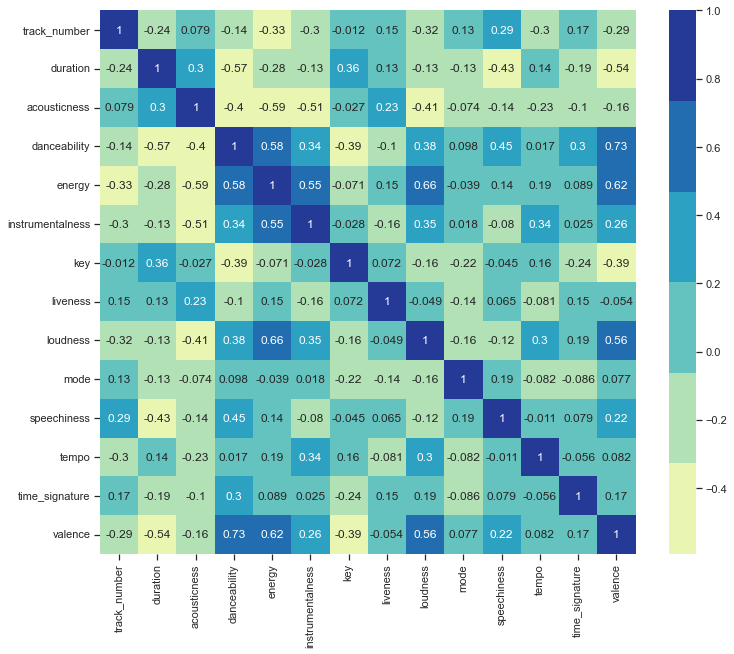

In [14]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, 
            cmap=sns.color_palette("YlGnBu"))
plt.show()

## Danceability vs. Valence

Let's take a look to the strongest correlation of the DataFrame (0,73) : danceability and valence.

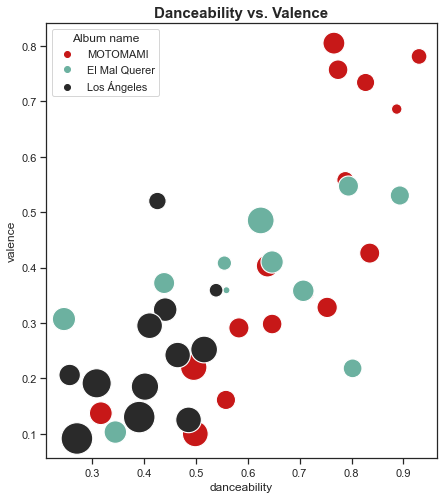

In [15]:
fig, ax = plt.subplots(figsize=(7,8))

sns.scatterplot(x="danceability", y="valence", data=df, 
                hue="album_name", palette=album_colors,
                size="duration", sizes=(50,1000),
                ax=ax)

h, labs = ax.get_legend_handles_labels()
ax.legend(h[1:], labs[1:4], loc='best', title="Album name")

ax.set_title("Danceability vs. Valence", 
             fontweight="bold", 
             fontsize=15)

plt.show()

Text(0.5, 1.0, 'Danceability vs. Valence')

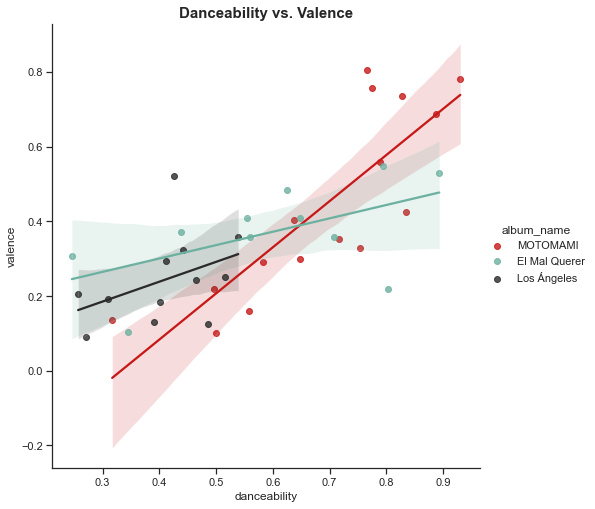

In [16]:
sns.lmplot(x="danceability", y="valence", data=df, 
           hue="album_name", palette=album_colors, 
           height=7)

plt.title("Danceability vs. Valence", 
          fontweight="bold", fontsize=15)

In [17]:
(df[["album_name", "song_title", "danceability", "valence"]]
 .sort_values(by=["valence"], ascending=False)
 .head(7)
)

,album_name,song_title,danceability,valence
2,MOTOMAMI,LA FAMA (with The Weeknd),0.766,0.805
6,MOTOMAMI,BIZCOCHITO,0.930,0.781
3,MOTOMAMI,BULERÍAS,0.774,0.757
0,MOTOMAMI,SAOKO,0.827,0.734
8,MOTOMAMI,MOTOMAMI,0.887,0.686
4,MOTOMAMI,CHICKEN TERIYAKI,0.788,0.558
23,El Mal Querer,DI MI NOMBRE - Cap.8: Éxtasis,0.794,0.547


In [18]:
(df[["song_title", "danceability", "valence"]]
 .loc[(df["album_name"] == "MOTOMAMI") & (df["valence"] > np.mean(df["valence"]))]
 .sort_values(by="valence", ascending=False)
)

,song_title,danceability,valence
2,LA FAMA (with The Weeknd),0.766,0.805
6,BIZCOCHITO,0.930,0.781
3,BULERÍAS,0.774,0.757
0,SAOKO,0.827,0.734
8,MOTOMAMI,0.887,0.686
4,CHICKEN TERIYAKI,0.788,0.558
14,LA COMBI VERSACE (feat. Tokischa),0.835,0.426
1,CANDY,0.638,0.403


In [19]:
(df[["song_title", "danceability", "valence"]]
 .loc[(df["album_name"] == "MOTOMAMI") & (df["valence"] < np.mean(df["valence"]))]
 .sort_values(by="valence", ascending=False)
)

,song_title,danceability,valence
13,Abcdefg,0.717,0.3520
9,DIABLO,0.753,0.3280
10,DELIRIO DE GRANDEZA,0.647,0.2980
5,HENTAI,0.583,0.2910
12,COMO UN G,0.496,0.2200
11,CUUUUuuuuuute,0.558,0.1610
15,SAKURA,0.317,0.1370
7,G3 N15,0.499,0.0998


## Plotting some features

In [20]:
def plot_features(df: pd.DataFrame, feature: str, title_1: str, title_2: str) -> plt.Figure: 
    """
    Generate a figure with 2 plots:
    - Subplot 1: An histogram of the feature (column).
    - Subplot 2: A boxplot of the feature (column) where each box corresponds to an album.
    
    Args:
    - df (pd.DataFrame): DataFrame
    - feature (str): column of the DataFrame
    - title_1 (str): title of the subplot 1.
    - title_2 (str): title of the subplot 2.
    
    Return:
    - Plot (plt.Figure).
    """
    
    fig, axes = plt.subplots(1,2, figsize=(15,5))

    sns.histplot(x=feature, data=df, ax=axes[0], kde=True)

    sns.boxplot(x="album_name", y=feature, data=df, palette=album_colors, ax=axes[1])

    axes[0].set_title(title_1, fontweight="bold", fontsize=15)
    axes[1].set_title(title_2, fontweight="bold", fontsize=15)
    axes[1].set_xlabel("Album name")
    
    return plt.show()

### Valence

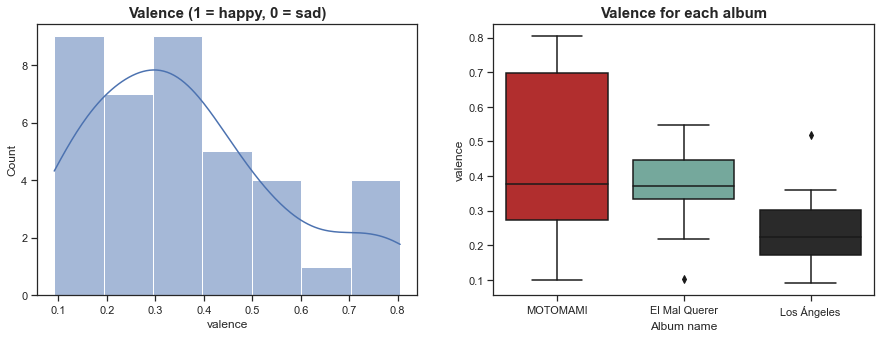

In [21]:
plot_features(df, "valence", "Valence (1 = happy, 0 = sad)", "Valence for each album")

In [22]:
df.loc[df["valence"].idxmax(), ["song_title", "album_name"]]

song_title    LA FAMA (with The Weeknd)
album_name                     MOTOMAMI
Name: 2, dtype: object

### Energy

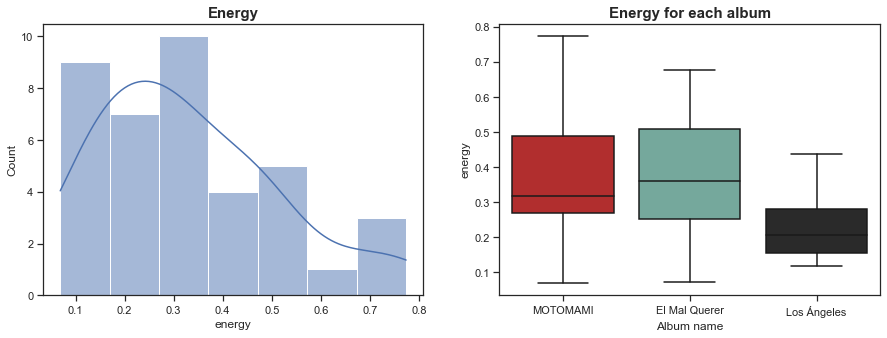

In [23]:
plot_features(df, "energy", "Energy", "Energy for each album")

In [24]:
df.loc[df["energy"].idxmax(), ["song_title", "album_name"]]

song_title    BIZCOCHITO
album_name      MOTOMAMI
Name: 6, dtype: object

In [25]:
df[["song_title", "album_name", "energy"]].sort_values(by="energy", ascending=False).head(7)

,song_title,album_name,energy
6,BIZCOCHITO,MOTOMAMI,0.774
0,SAOKO,MOTOMAMI,0.768
18,PIENSO EN TU MIRÁ - Cap.3: Celos,El Mal Querer,0.676
17,QUE NO SALGA LA LUNA - Cap.2: Boda,El Mal Querer,0.655
23,DI MI NOMBRE - Cap.8: Éxtasis,El Mal Querer,0.534
14,LA COMBI VERSACE (feat. Tokischa),MOTOMAMI,0.495
1,CANDY,MOTOMAMI,0.490


### Tempo

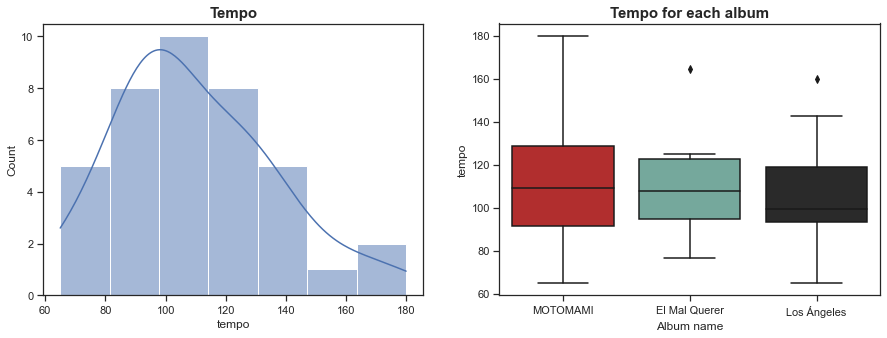

In [26]:
plot_features(df, "tempo", "Tempo", "Tempo for each album")

In [27]:
df.loc[df["tempo"].idxmax(), ["song_title", "album_name"]]

song_title       CANDY
album_name    MOTOMAMI
Name: 1, dtype: object

In [28]:
df[["song_title", "album_name", "tempo"]].sort_values(by="tempo", ascending=False).head(7)

,song_title,album_name,tempo
1,CANDY,MOTOMAMI,179.905
18,PIENSO EN TU MIRÁ - Cap.3: Celos,El Mal Querer,164.510
31,Día 14 De Abril,Los Ángeles,160.013
27,Si Tú Supieras Compañero,Los Ángeles,142.835
32,Que Se Muere Que Se Muere,Los Ángeles,142.064
11,CUUUUuuuuuute,MOTOMAMI,138.818
2,LA FAMA (with The Weeknd),MOTOMAMI,136.016


### Speechiness

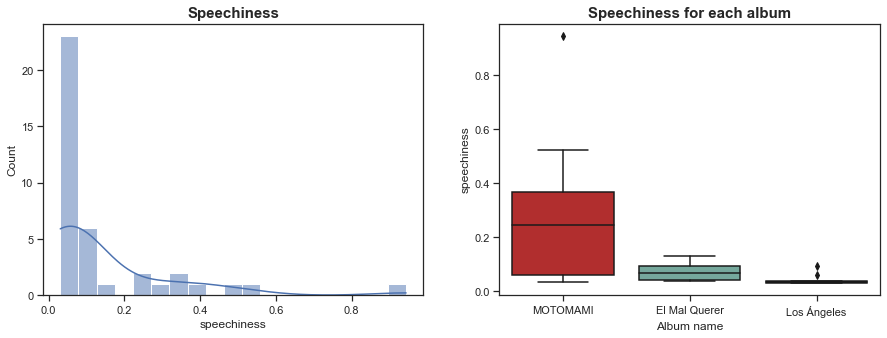

In [29]:
plot_features(df, "speechiness", "Speechiness", "Speechiness for each album")

#### Songs with spoken parts

In [30]:
df[["song_title", "album_name", "speechiness"]].sort_values(by="speechiness", ascending=False).head(7)

,song_title,album_name,speechiness
13,Abcdefg,MOTOMAMI,0.944
14,LA COMBI VERSACE (feat. Tokischa),MOTOMAMI,0.522
8,MOTOMAMI,MOTOMAMI,0.465
5,HENTAI,MOTOMAMI,0.406
11,CUUUUuuuuuute,MOTOMAMI,0.353
9,DIABLO,MOTOMAMI,0.351
3,BULERÍAS,MOTOMAMI,0.303


### Acousticness

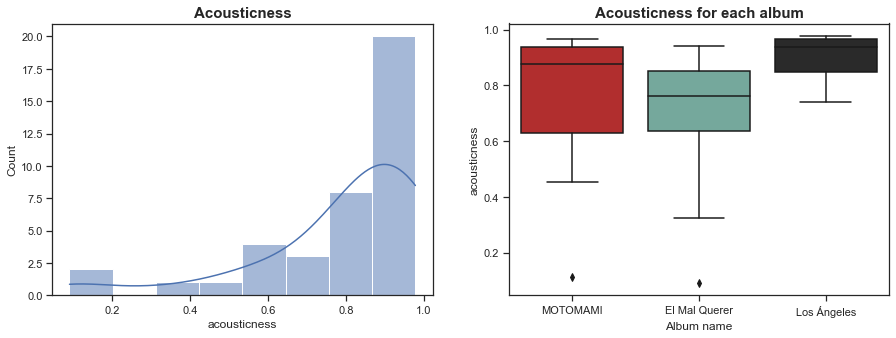

In [31]:
plot_features(df, "acousticness", "Acousticness", "Acousticness for each album")

#### Most acoustic songs

In [32]:
df[["song_title", "album_name", "acousticness"]].sort_values(by="acousticness", ascending=False).head(7)

,song_title,album_name,acousticness
32,Que Se Muere Que Se Muere,Los Ángeles,0.978
29,Nos Quedamos Solitos,Los Ángeles,0.977
34,Te Venero,Los Ángeles,0.969
7,G3 N15,MOTOMAMI,0.965
31,Día 14 De Abril,Los Ángeles,0.964
12,COMO UN G,MOTOMAMI,0.962
36,La Hija De Juan Simón,Los Ángeles,0.961


#### Least acoustic songs

In [33]:
df[["song_title", "album_name", "acousticness"]].sort_values(by="acousticness", ascending=True).head(5)

,song_title,album_name,acousticness
18,PIENSO EN TU MIRÁ - Cap.3: Celos,El Mal Querer,0.0909
11,CUUUUuuuuuute,MOTOMAMI,0.1130
19,DE AQUÍ NO SALES - Cap.4: Disputa,El Mal Querer,0.3240
4,CHICKEN TERIYAKI,MOTOMAMI,0.4540
16,MALAMENTE - Cap.1: Augurio,El Mal Querer,0.5490


_____

# Unsupervised Learning with K-Means

## Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale. 

There are two common ways of rescaling:
- **Min-Max scaling**
- **standardization (mean-0, sigma-1)**

Here, we will use **Standardization Scaling**.

In [34]:
df_ml = df[['album_name', 'song_title', 'danceability', 'valence']].copy()
df_ml.head()

,album_name,song_title,danceability,valence
0,MOTOMAMI,SAOKO,0.827,0.734
1,MOTOMAMI,CANDY,0.638,0.403
2,MOTOMAMI,LA FAMA (with The Weeknd),0.766,0.805
3,MOTOMAMI,BULERÍAS,0.774,0.757
4,MOTOMAMI,CHICKEN TERIYAKI,0.788,0.558


In [35]:
X = df_ml[["danceability", "valence"]]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled.shape

(39, 2)

In [36]:
df_ml_scaled = pd.DataFrame(X_scaled)
df_ml_scaled.columns = ["danceability", "valence"]
df_ml_scaled.head()

,danceability,valence
0,1.295314,1.902572
1,0.312225,0.217104
2,0.978020,2.264108
3,1.019633,2.019689
4,1.092454,1.006372


## K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

- First we initialize k points, called means, randomly.

- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.

- We repeat the process for a given number of iterations and at the end, we have our clusters

### Finding the Optimal Number of Clusters

**Elbow Curve to get the right number of Clusters**

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

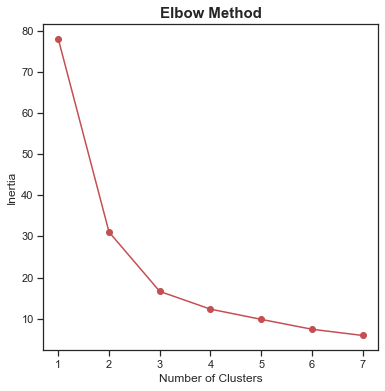

In [37]:
# Elbow Curve

inertia = []

for num_clusters in range(1, 8):
    kmeans = KMeans(init="k-means++", n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_ml_scaled)
    
    inertia.append(kmeans.inertia_)
    
# Plotting the Elbow Curve

plt.figure(figsize=(6,6))
plt.plot(np.arange(1, 8), inertia, "o", color="r")
plt.plot(np.arange(1, 8), inertia, "-", color="r")
plt.title("Elbow Method", fontweight="bold", fontsize=15)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
# Silhouette analysis
for num_clusters in range(2, 8):
    
    # initialize k-means
    kmeans = KMeans(init="k-means++", n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_ml_scaled)
    
    # cluster labels
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_ml_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4768742012411153
For n_clusters=3, the silhouette score is 0.45886924421622227
For n_clusters=4, the silhouette score is 0.3870043121628042
For n_clusters=5, the silhouette score is 0.3850388918751252
For n_clusters=6, the silhouette score is 0.39224535934307464
For n_clusters=7, the silhouette score is 0.3947736915435532


### K-means with k=3 

We get the optimum value of k is 3. We’ll try clustering with k = 3

In [39]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_ml_scaled)
y_kmeans = kmeans.predict(df_ml_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [40]:
df_ml_scaled["album_name"] = df_ml["album_name"]
df_ml_scaled["song_title"] = df_ml["song_title"]
df_ml_scaled["cluster"] = y_kmeans
df_ml_scaled.head()

,danceability,valence,album_name,song_title,cluster
0,1.295314,1.902572,MOTOMAMI,SAOKO,1
1,0.312225,0.217104,MOTOMAMI,CANDY,0
2,0.978020,2.264108,MOTOMAMI,LA FAMA (with The Weeknd),1
3,1.019633,2.019689,MOTOMAMI,BULERÍAS,1
4,1.092454,1.006372,MOTOMAMI,CHICKEN TERIYAKI,1


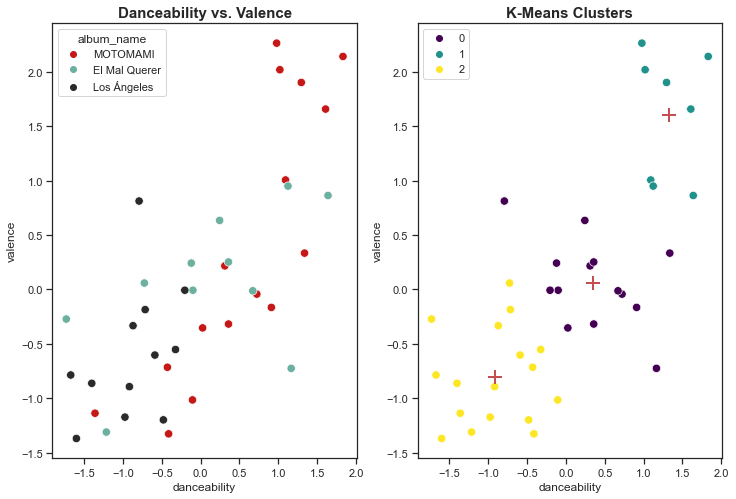

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

# Subplot 1 
sns.scatterplot(x="danceability", y="valence", 
                data=df_ml_scaled, 
                hue="album_name", 
                palette=album_colors,
                s=70,
                ax=axes[0])

axes[0].set_title("Danceability vs. Valence", 
             fontweight="bold", 
             fontsize=15)

# Subplot 2
sns.scatterplot(x="danceability", y="valence", 
                data=df_ml_scaled, 
                hue="cluster",
                palette="viridis",
                s=70,
                ax=axes[1])

sns.scatterplot(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             
               marker="+",
                color='r',
                linewidth=2,
               ax=axes[1])

axes[1].set_title("K-Means Clusters", 
             fontweight="bold", 
             fontsize=15)

plt.show()

### Songs of the Cluster Nº 0

In [42]:
df_ml_scaled.loc[df_ml_scaled["cluster"] == 0, ["album_name", "song_title", "cluster"]]

,album_name,song_title,cluster
1,MOTOMAMI,CANDY,0
5,MOTOMAMI,HENTAI,0
9,MOTOMAMI,DIABLO,0
10,MOTOMAMI,DELIRIO DE GRANDEZA,0
13,MOTOMAMI,Abcdefg,0
14,MOTOMAMI,LA COMBI VERSACE (feat. Tokischa),0
17,El Mal Querer,QUE NO SALGA LA LUNA - Cap.2: Boda,0
18,El Mal Querer,PIENSO EN TU MIRÁ - Cap.3: Celos,0
19,El Mal Querer,DE AQUÍ NO SALES - Cap.4: Disputa,0
21,El Mal Querer,PRESO - Cap.6: Clausura,0


### Songs of the Cluster Nº 1

In [43]:
df_ml_scaled.loc[df_ml_scaled["cluster"] == 1, ["album_name", "song_title", "cluster"]]

,album_name,song_title,cluster
0,MOTOMAMI,SAOKO,1
2,MOTOMAMI,LA FAMA (with The Weeknd),1
3,MOTOMAMI,BULERÍAS,1
4,MOTOMAMI,CHICKEN TERIYAKI,1
6,MOTOMAMI,BIZCOCHITO,1
8,MOTOMAMI,MOTOMAMI,1
16,El Mal Querer,MALAMENTE - Cap.1: Augurio,1
23,El Mal Querer,DI MI NOMBRE - Cap.8: Éxtasis,1


### Songs of the Cluster Nº 2

In [44]:
df_ml_scaled.loc[df_ml_scaled["cluster"] == 2, ["album_name", "song_title", "cluster"]]

,album_name,song_title,cluster
7,MOTOMAMI,G3 N15,2
11,MOTOMAMI,CUUUUuuuuuute,2
12,MOTOMAMI,COMO UN G,2
15,MOTOMAMI,SAKURA,2
20,El Mal Querer,RENIEGO - Cap.5: Lamento,2
24,El Mal Querer,NANA - Cap.9: Concepción,2
25,El Mal Querer,MALDICIÓN - Cap.10: Cordura,2
27,Los Ángeles,Si Tú Supieras Compañero,2
28,Los Ángeles,De Plata,2
29,Los Ángeles,Nos Quedamos Solitos,2


## Conclusions

- Rosalía has been decreasing the duration of the songs, in average, in each of her albums: MOTOMAMI has the shortest average songs length of the 3 albums.


- The variety of genres in MOTOMAMI is noticeable compared to the other 2 albums (see the plot Danceability vs. Valence).


- MOTOMAMI has much happier songs, while Los Angeles has sad songs.


- MOTOMAMI has the most spoken-word songs compared to the other 2 albums. The comparison with Los Angeles is interesting: Los Angeles has almost no spoken-word songs.


- Rosalía gives a fundamental role to acoustic: all albums are characterized by having a high acoustic content. Los Angeles stands out.


- Grouping the songs in 3 clusters using the K-Means algorithm, we can say that MOTOMAMI has a good presence in all the clusters, showing the variety of songs on the album, while Los Angeles has almost presence in only 1 of them. 

## Next Steps
- Using feature reduction techniques such as Principal Component Analysis (PCA) to only plot combinations of features that are important.


- Complement the analysis with a Hierarchical Clustering, using Dendogram plots.


- Analyze the featureslike it was done before (with valence, energy, speechiness, acousticness, etc.), but now for each cluster.